# Unsupervised Clustering

by : Hasan Omeis
____

Here we'll take data about criminal accidents , which happend in Boston between 2015 & 2018 , and we need to classify it in unsupervised way , so we can take each segment to handle it later


also you can find the data here : 

https://www.kaggle.com/AnalyzeBoston/crimes-in-boston/kernels


____

lets first import needed libraries



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Loading Data

now lets read the data file , don't forget to specify the encoding to latin-1 to avoid any error

In [6]:
data = pd.read_csv('/content/crime.csv', encoding='latin-1')

data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"



_____


looks a mixed data which containsboth numerical & categorical values , lets check the shape



In [7]:
data.shape

(319073, 17)

how about the range of numbers of numerical values . . 

In [8]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


_____

when you look carfeully at the numbers , you can see the Offense Code is not a "numerical value" , but looks categorical 

also min year is 2015 & max is 2016

also for Lat & Long values , almost all of them around (42 , -71) , which refer to Boston city . . 

how about the Nulls ? 


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

____

# Data Processing

a huge amount of nulls at Shooting feature , also exists in ( District , UCR Part , Street , both Lat & Long )

before handling nulls or making categorical , we need to look at unique values , so we can drop features which have a very big amount of unique values , which will never help us in categorical features



In [10]:
for column in data.columns : 
    print('Length of unique data for {0} is {1} '.format(column , len(data[column].unique())))
    

Length of unique data for INCIDENT_NUMBER is 282517 
Length of unique data for OFFENSE_CODE is 222 
Length of unique data for OFFENSE_CODE_GROUP is 67 
Length of unique data for OFFENSE_DESCRIPTION is 244 
Length of unique data for DISTRICT is 13 
Length of unique data for REPORTING_AREA is 879 
Length of unique data for SHOOTING is 2 
Length of unique data for OCCURRED_ON_DATE is 232566 
Length of unique data for YEAR is 4 
Length of unique data for MONTH is 12 
Length of unique data for DAY_OF_WEEK is 7 
Length of unique data for HOUR is 24 
Length of unique data for UCR_PART is 5 
Length of unique data for STREET is 4658 
Length of unique data for Lat is 18179 
Length of unique data for Long is 18179 
Length of unique data for Location is 18194 


_____

Ok , Incident Number is anyway a reference number which will not help in training. . 

and the date will not help us so much since we'll keep the data of ( year , month & weekday ). 

also street feature have a huge amount of unique values so we can drop it since we'll keep long & lat , and we'll drop reporting area and ocation for the same reason . 

also we can drop offense code since we'llkeep offense code group to avoid make 222 values at get_dummies .

lets drop unhelpful features . . 




In [11]:
data.drop(['INCIDENT_NUMBER' , 'OCCURRED_ON_DATE' ,'STREET' , 'OFFENSE_CODE' , 'REPORTING_AREA','Location'],axis=1, inplace=True)

data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,NaN,2018,9,Sunday,13,Part One,42.357791,-71.139371
1,Vandalism,VANDALISM,C11,NaN,2018,8,Tuesday,0,Part Two,42.306821,-71.060300
2,Towed,TOWED MOTOR VEHICLE,D4,NaN,2018,9,Monday,19,Part Three,42.346589,-71.072429
3,Investigate Property,INVESTIGATE PROPERTY,D4,NaN,2018,9,Monday,21,Part Three,42.334182,-71.078664
4,Investigate Property,INVESTIGATE PROPERTY,B3,NaN,2018,9,Monday,21,Part Three,42.275365,-71.090361


lets check it now  

In [12]:
for column in data.columns : 
    print('Length of unique data for {0} is {1} '.format(column , len(data[column].unique())))

Length of unique data for OFFENSE_CODE_GROUP is 67 
Length of unique data for OFFENSE_DESCRIPTION is 244 
Length of unique data for DISTRICT is 13 
Length of unique data for SHOOTING is 2 
Length of unique data for YEAR is 4 
Length of unique data for MONTH is 12 
Length of unique data for DAY_OF_WEEK is 7 
Length of unique data for HOUR is 24 
Length of unique data for UCR_PART is 5 
Length of unique data for Lat is 18179 
Length of unique data for Long is 18179 


____

# Handling Location

now for Lat & Long data , it looks it got a huge amount of unique data , so we can never convert it to categorical data in this way , and also we cannot get rid of it , since it's very important imformation for clustering the data . . 

so we can round the Lat & Long data to two decimal numbers , so it will - geographically - classify the whole city into specific zones , & will reduce the amount of unique data for them


In [13]:
data['Lat code'] = np.round(data['Lat'],2)
data['Long code'] = np.round(data['Long'],2)

data.drop(['Lat','Long'],axis=1, inplace=True)


now lets check the data

In [14]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code
0,Larceny,LARCENY ALL OTHERS,D14,NaN,2018,9,Sunday,13,Part One,42.36,-71.14
1,Vandalism,VANDALISM,C11,NaN,2018,8,Tuesday,0,Part Two,42.31,-71.06
2,Towed,TOWED MOTOR VEHICLE,D4,NaN,2018,9,Monday,19,Part Three,42.35,-71.07
3,Investigate Property,INVESTIGATE PROPERTY,D4,NaN,2018,9,Monday,21,Part Three,42.33,-71.08
4,Investigate Property,INVESTIGATE PROPERTY,B3,NaN,2018,9,Monday,21,Part Three,42.28,-71.09


now it looks more simple & smart , lets see the amount of unique data

In [15]:
for column in data.columns : 
    print('Length of unique data for {0} is {1} '.format(column , len(data[column].unique())))

Length of unique data for OFFENSE_CODE_GROUP is 67 
Length of unique data for OFFENSE_DESCRIPTION is 244 
Length of unique data for DISTRICT is 13 
Length of unique data for SHOOTING is 2 
Length of unique data for YEAR is 4 
Length of unique data for MONTH is 12 
Length of unique data for DAY_OF_WEEK is 7 
Length of unique data for HOUR is 24 
Length of unique data for UCR_PART is 5 
Length of unique data for Lat code is 20 
Length of unique data for Long code is 22 


____
cool , 20 unique Lat & 22 unique Long , which will refer to 440 zones in Boston city , which is very helpful in making clusters 


___

# Handling Nulls

now we have to manage all missing data in other features , let's see it now 


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   319073 non-null  object 
 1   OFFENSE_DESCRIPTION  319073 non-null  object 
 2   DISTRICT             317308 non-null  object 
 3   SHOOTING             1019 non-null    object 
 4   YEAR                 319073 non-null  int64  
 5   MONTH                319073 non-null  int64  
 6   DAY_OF_WEEK          319073 non-null  object 
 7   HOUR                 319073 non-null  int64  
 8   UCR_PART             318983 non-null  object 
 9   Lat code             299074 non-null  float64
 10  Long code            299074 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 26.8+ MB


____

shooting feature got the biggest amount of Nulls , lets see what it contains 

In [17]:
data['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)


ok , it either Y for yes there was shooting in the crime , or nan for the crime contain not shooting , ok , let's make a new feature , which will got 1 for shooting & 0 for no shooting

In [18]:
data['shooting code'] = np.where(data['SHOOTING']=='Y' , 1 , 0)

also we can know the percentage of shooting among all accidents happend here 

In [19]:
print( 'Shooting Percentage  is {} %'.format(round((data['shooting code'].sum() / data.shape[0]) * 100,2)))



Shooting Percentage  is 0.32 %


ok , a very tiny percentage  , so we'll keep the shooting code feature & drop the original shooting feature , also let's check other features nulls 

In [20]:
data.drop(['SHOOTING'],axis=1, inplace=True)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   319073 non-null  object 
 1   OFFENSE_DESCRIPTION  319073 non-null  object 
 2   DISTRICT             317308 non-null  object 
 3   YEAR                 319073 non-null  int64  
 4   MONTH                319073 non-null  int64  
 5   DAY_OF_WEEK          319073 non-null  object 
 6   HOUR                 319073 non-null  int64  
 7   UCR_PART             318983 non-null  object 
 8   Lat code             299074 non-null  float64
 9   Long code            299074 non-null  float64
 10  shooting code        319073 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 26.8+ MB


___

more than 1700 nulls in the district feature , lets check the unique values

In [21]:
data['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

since we cannot replace nulls with mean or median for categorical values , so we'll just put the word none instead of nulls , using fillna tool

In [22]:
data.DISTRICT.fillna('none', inplace=True)

let's check it again 

In [23]:
data['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'none', 'A1', 'E5', 'A7',
       'E13', 'E18', 'A15'], dtype=object)

cool , no nulls now , lets move to UCR Part


In [24]:
data['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

again , we'll have to put any word since we cannot calculate mean , so lets use none

In [25]:
data.UCR_PART.fillna('none', inplace=True)

check it now

In [26]:
data['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', 'none'],
      dtype=object)

____

now for Lat & Long , first lets get the mean values for them & round it 

In [27]:
lat_mean = data['Lat code'].sum() / 299074
long_mean =  data['Long code'].sum() / 299074
print(round(lat_mean,2))
print(round(long_mean,2))

42.21
-70.91


so we can fill null values in Lat & Long with that mean 

In [28]:
data['Lat code'].fillna(round(lat_mean,2), inplace=True)
data['Long code'].fillna(round(long_mean,2), inplace=True)

now we filled all nulls & it's ready for categorical values , lets have last check it data 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   319073 non-null  object 
 1   OFFENSE_DESCRIPTION  319073 non-null  object 
 2   DISTRICT             319073 non-null  object 
 3   YEAR                 319073 non-null  int64  
 4   MONTH                319073 non-null  int64  
 5   DAY_OF_WEEK          319073 non-null  object 
 6   HOUR                 319073 non-null  int64  
 7   UCR_PART             319073 non-null  object 
 8   Lat code             319073 non-null  float64
 9   Long code            319073 non-null  float64
 10  shooting code        319073 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 26.8+ MB


cool , no nulls there , lets have a look to the features

In [30]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code,shooting code
0,Larceny,LARCENY ALL OTHERS,D14,2018,9,Sunday,13,Part One,42.36,-71.14,0
1,Vandalism,VANDALISM,C11,2018,8,Tuesday,0,Part Two,42.31,-71.06,0
2,Towed,TOWED MOTOR VEHICLE,D4,2018,9,Monday,19,Part Three,42.35,-71.07,0
3,Investigate Property,INVESTIGATE PROPERTY,D4,2018,9,Monday,21,Part Three,42.33,-71.08,0
4,Investigate Property,INVESTIGATE PROPERTY,B3,2018,9,Monday,21,Part Three,42.28,-71.09,0


____

# Get Dummies

ok , before we run the clustering model , we've to convert all categorical values into numerical dummies . 

we have here five categorical features which are : 

Offense Groud

Offense Description

District

Day of week

UCR Part



so we'll use LabelEncoder model from Sklearn to do it quickly , then drop the original feature . 


lets start with Offense Group . .




In [31]:
enc  = LabelEncoder()
enc.fit(data['OFFENSE_CODE_GROUP'])
data['Offense Code'] = enc.transform(data['OFFENSE_CODE_GROUP'])
data.drop(['OFFENSE_CODE_GROUP'],axis=1, inplace=True)

ok done , let's have a look

In [32]:
data.head()

,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code,shooting code,Offense Code
0,LARCENY ALL OTHERS,D14,2018,9,Sunday,13,Part One,42.36,-71.14,0,34
1,VANDALISM,C11,2018,8,Tuesday,0,Part Two,42.31,-71.06,0,63
2,TOWED MOTOR VEHICLE,D4,2018,9,Monday,19,Part Three,42.35,-71.07,0,62
3,INVESTIGATE PROPERTY,D4,2018,9,Monday,21,Part Three,42.33,-71.08,0,32
4,INVESTIGATE PROPERTY,B3,2018,9,Monday,21,Part Three,42.28,-71.09,0,32


looks great , letl's repeat it to Offense Description

In [33]:
enc  = LabelEncoder()
enc.fit(data['OFFENSE_DESCRIPTION'])
data['Offense Desc Code'] = enc.transform(data['OFFENSE_DESCRIPTION'])
data.drop(['OFFENSE_DESCRIPTION'],axis=1, inplace=True)
data.head()

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code,shooting code,Offense Code,Offense Desc Code
0,D14,2018,9,Sunday,13,Part One,42.36,-71.14,0,34,129
1,C11,2018,8,Tuesday,0,Part Two,42.31,-71.06,0,63,230
2,D4,2018,9,Monday,19,Part Three,42.35,-71.07,0,62,222
3,D4,2018,9,Monday,21,Part Three,42.33,-71.08,0,32,123
4,B3,2018,9,Monday,21,Part Three,42.28,-71.09,0,32,123


then District

In [34]:
enc  = LabelEncoder()
enc.fit(data['DISTRICT'])
data['District Code'] = enc.transform(data['DISTRICT'])
data.drop(['DISTRICT'],axis=1, inplace=True)
data.head()

,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat code,Long code,shooting code,Offense Code,Offense Desc Code,District Code
0,2018,9,Sunday,13,Part One,42.36,-71.14,0,34,129,7
1,2018,8,Tuesday,0,Part Two,42.31,-71.06,0,63,230,5
2,2018,9,Monday,19,Part Three,42.35,-71.07,0,62,222,8
3,2018,9,Monday,21,Part Three,42.33,-71.08,0,32,123,8
4,2018,9,Monday,21,Part Three,42.28,-71.09,0,32,123,4


& day of week

In [35]:
enc  = LabelEncoder()
enc.fit(data['DAY_OF_WEEK'])
data['Day Code'] = enc.transform(data['DAY_OF_WEEK'])
data.drop(['DAY_OF_WEEK'],axis=1, inplace=True)
data.head()

,YEAR,MONTH,HOUR,UCR_PART,Lat code,Long code,shooting code,Offense Code,Offense Desc Code,District Code,Day Code
0,2018,9,13,Part One,42.36,-71.14,0,34,129,7,3
1,2018,8,0,Part Two,42.31,-71.06,0,63,230,5,5
2,2018,9,19,Part Three,42.35,-71.07,0,62,222,8,1
3,2018,9,21,Part Three,42.33,-71.08,0,32,123,8,1
4,2018,9,21,Part Three,42.28,-71.09,0,32,123,4,1


then UCR part

In [36]:
enc  = LabelEncoder()
enc.fit(data['UCR_PART'])
data['UCR Code'] = enc.transform(data['UCR_PART'])
data.drop(['UCR_PART'],axis=1, inplace=True)
data.head()

,YEAR,MONTH,HOUR,Lat code,Long code,shooting code,Offense Code,Offense Desc Code,District Code,Day Code,UCR Code
0,2018,9,13,42.36,-71.14,0,34,129,7,3,1
1,2018,8,0,42.31,-71.06,0,63,230,5,5,3
2,2018,9,19,42.35,-71.07,0,62,222,8,1,2
3,2018,9,21,42.33,-71.08,0,32,123,8,1,2
4,2018,9,21,42.28,-71.09,0,32,123,4,1,2


ok , lets have a look to the data 

In [37]:
data.describe()

,YEAR,MONTH,HOUR,Lat code,Long code,shooting code,Offense Code,Offense Desc Code,District Code,Day Code,UCR Code
count,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000,319073.000000
mean,2016.560586,6.609719,13.118205,42.214125,-70.908309,0.003194,40.943972,151.458005,5.180407,2.993569,2.105481
std,0.996344,3.273691,6.294205,2.090988,3.382356,0.056422,17.091211,66.670023,3.118157,2.031436,0.710202
min,2015.000000,1.000000,0.000000,-1.000000,-71.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,9.000000,42.290000,-71.100000,0.000000,32.000000,122.000000,3.000000,1.000000,2.000000
50%,2017.000000,7.000000,14.000000,42.320000,-71.080000,0.000000,42.000000,155.000000,5.000000,3.000000,2.000000
75%,2017.000000,9.000000,18.000000,42.350000,-71.060000,0.000000,56.000000,215.000000,8.000000,5.000000,3.000000
max,2018.000000,12.000000,23.000000,42.400000,-1.000000,1.000000,66.000000,243.000000,12.000000,6.000000,4.000000


and make the last check or nulls

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               319073 non-null  int64  
 1   MONTH              319073 non-null  int64  
 2   HOUR               319073 non-null  int64  
 3   Lat code           319073 non-null  float64
 4   Long code          319073 non-null  float64
 5   shooting code      319073 non-null  int64  
 6   Offense Code       319073 non-null  int64  
 7   Offense Desc Code  319073 non-null  int64  
 8   District Code      319073 non-null  int64  
 9   Day Code           319073 non-null  int64  
 10  UCR Code           319073 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 26.8 MB


___

# Run the Model


so we are ready to run the unsupervised model for it now 


first let's split the data to train & test

In [39]:
X_train = data[:250000]
X_test = data[250000:]

how about the shape ? 

In [40]:
print('X Train Shape is {}'.format(X_train.shape))
print('X Test Shape is {}'.format(X_test.shape))

X Train Shape is (250000, 11)
X Test Shape is (69073, 11)


____

so we'll use 3 models to choose the best one

lets start with Kmeans , from Sklearn

In [41]:
KMeansModel = KMeans(n_clusters=5,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto') # also can be full or elkan
KMeansModel.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

____

now we need to have a look to its attributes

In [42]:
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('---------------------------------------------------')
print('KMeansModel labels are : ' , KMeansModel.labels_[:20])
print('---------------------------------------------------')
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('---------------------------------------------------')
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)
print('---------------------------------------------------')


KMeansModel centers are :  [[ 2.01693619e+03  6.33527893e+00  1.30638119e+01  4.22348647e+01
  -7.09413492e+01  2.80615108e-04  5.86806039e+01  2.65291840e+01
   5.11808284e+00  2.96840274e+00  2.48574475e+00]
 [ 2.01692765e+03  6.42162556e+00  1.33280945e+01  4.22242126e+01
  -7.09219112e+01  1.40628662e-03  4.07947993e+01  1.60396963e+02
   5.28378343e+00  2.95515508e+00  1.70194536e+00]
 [ 2.01693568e+03  6.30399187e+00  1.29130761e+01  4.22129249e+01
  -7.09088595e+01  2.22509765e-03  5.44483572e+01  2.23900512e+02
   5.13419516e+00  3.03188904e+00  2.34064552e+00]
 [ 2.01691427e+03  6.48804974e+00  1.30925241e+01  4.21115607e+01
  -7.07462348e+01  5.78404842e-04  2.77418455e+01  1.15935508e+02
   5.30527381e+00  3.00634180e+00  2.22989527e+00]
 [ 2.01692126e+03  6.31587184e+00  1.35363232e+01  4.21767136e+01
  -7.08444300e+01  1.96853636e-02  9.79651594e+00  4.53046289e+01
   4.95712874e+00  3.00498312e+00  2.05773824e+00]]
---------------------------------------------------
KMean

how about predicting from x_test

In [43]:
#Calculating Prediction
y_pred = KMeansModel.predict(X_test)
print('Predicted Value for KMeansModel is : ' , y_pred[:10])

Predicted Value for KMeansModel is :  [0 2 2 2 2 1 2 0 2 2]


____

then lets use KNN model for unsupervised training

In [44]:
NearestNeighborsModel = NearestNeighbors(n_neighbors=4,radius=1.0,algorithm='auto')#it can be:ball_tree,kd_tree,brute
NearestNeighborsModel.fit(X_train)

NearestNeighbors(n_neighbors=4)

then check the attributes

In [45]:
#Calculating Details
print('NearestNeighborsModel Train kneighbors are : ' , NearestNeighborsModel.kneighbors(X_train[: 5]))
print('----------------------------------------------------')
print('NearestNeighborsModel Train radius kneighbors are : ' , NearestNeighborsModel.radius_neighbors(X_train[:  1]))
print('----------------------------------------------------')
print('NearestNeighborsModel Test kneighbors are : ' , NearestNeighborsModel.kneighbors(X_test[: 5]))
print('----------------------------------------------------')
print('NearestNeighborsModel Test  radius kneighbors are : ' , NearestNeighborsModel.radius_neighbors(X_test[:  1]))
print('----------------------------------------------------')

NearestNeighborsModel Train kneighbors are :  (array([[0.        , 1.41428427, 1.41626269, 1.41626269],
       [0.        , 1.00005   , 1.0004499 , 1.41424892],
       [0.        , 1.41477913, 1.73207967, 1.73216627],
       [0.        , 1.00039992, 1.41435498, 1.41439033],
       [0.        , 1.41421356, 1.41439033, 1.41439033]]), array([[    0,  7744, 98599,  4220],
       [    1, 26618,  1035,  7112],
       [    2, 92073,  4420, 96952],
       [    3, 93633,  7833, 92701],
       [    4,  2417, 94202, 94226]]))
----------------------------------------------------
NearestNeighborsModel Train radius kneighbors are :  (array([array([0.])], dtype=object), array([array([0])], dtype=object))
----------------------------------------------------
NearestNeighborsModel Test kneighbors are :  (array([[1.00005   , 1.00005   , 1.0001    , 1.41424892],
       [0.        , 1.41421356, 1.41424892, 1.41428427],
       [0.02236068, 2.00019999, 2.001999  , 2.23629157],
       [0.01414214, 1.41424892,

____

also we can use Hierarchical clusering , it migh be useful , but we've to limit the using data to a tiny amount , lets say we'll check it in the first 1000 sample size

In [46]:
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',# it can be l1,l2,manhattan,cosine,precomputed
                                             linkage='ward')# it can be complete,average,single

y_pred_train = AggClusteringModel.fit_predict(X_train[:1000])
y_pred_test = AggClusteringModel.fit_predict(X_test[:1000])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


now we can draw the dendogram using Scipy , for the first 30 record of training set

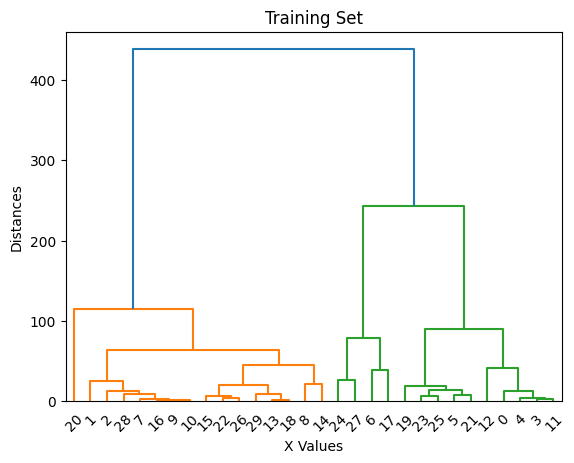

In [47]:
#draw the Hierarchical graph for Training set
dendrogram = sch.dendrogram(sch.linkage(X_train[:30], method = 'ward'))# it can be complete,average,single
plt.title('Training Set')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()



and we can check it in the first 30 record in the test set

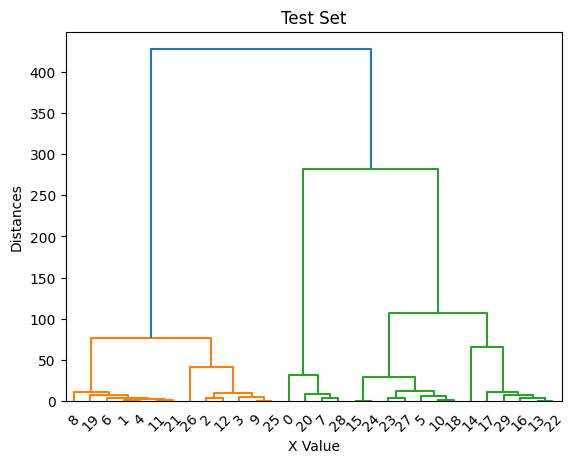

In [48]:
#draw the Hierarchical graph for Test set
dendrogram = sch.dendrogram(sch.linkage(X_test[:30], method = 'ward'))# it can be complete,average,single
plt.title('Test Set')
plt.xlabel('X Value')
plt.ylabel('Distances')
plt.show()



___


# Finally

as we saw now , data processing is the most important step to manipulate data & make it ready for our model 

